In [ ]:
# Analyze stock returns using clustering

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
df = pd.read_csv("returns.csv")
print(df.head())

print(df['Industry'].value_counts()['Consumer Discretionary'])
print(df['Industry'].value_counts()['Energy'])

# 69 companies are there in the Consumer Discretionary sector; 38 in the Energy sector



  symbol                Industry  avg200603  avg200604  avg200605  avg200606  \
0      A             Health Care   0.039334   0.016401  -0.094683  -0.090490   
1     AA               Materials   0.040890   0.098826  -0.070155   0.017606   
2   AAPL  Information Technology  -0.087448   0.107115  -0.158681  -0.042606   
3    ABC             Health Care   0.044538  -0.108473   0.011936  -0.043327   
4    ABT             Health Care  -0.038708   0.017038  -0.001169   0.019183   

   avg200607  avg200608  avg200609  avg200610  ...  avg201505  avg201506  \
0  -0.103653   0.135238   0.016478   0.095077  ...  -0.005313  -0.068791   
1  -0.095683  -0.041422  -0.025758   0.031387  ...  -0.074074  -0.110845   
2   0.179764   0.009372   0.124141   0.078695  ...   0.033148  -0.037228   
3   0.024801   0.028526   0.015506   0.039004  ...  -0.022238  -0.057353   
4   0.100906   0.026554  -0.005738   0.001319  ...   0.040462   0.006356   

   avg201507  avg201508  avg201509  avg201510  avg201511  avg2

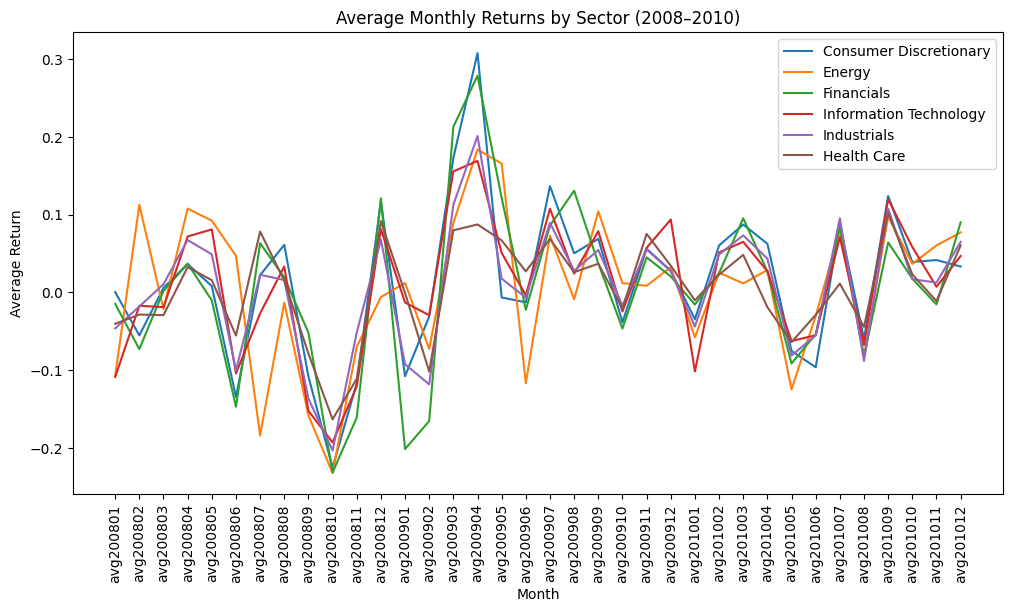

In [ ]:


import matplotlib.pyplot as plt

# generate all dates between 2008/01 ~ 2010/12
cols = [f"avg{year}{month:02d}"
        for year in range(2008, 2011)
        for month in range(1, 13)]

sectors = ["Consumer Discretionary",
           "Energy",
           "Financials",
           "Information Technology",
           "Industrials",
           "Health Care"]

plt.figure(figsize=(12,6))

for sec in sectors:
    # find all companies
    temp = df[df["Industry"] == sec]

    # industry avg
    avg_return = temp[cols].mean()
    plt.plot(cols, avg_return, label=sec)

plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Average Return")
plt.title("Average Monthly Returns by Sector (2008–2010)")
plt.legend()
plt.show()

##Industry information is helpful but not enough for diversification.
#The sectors in the plot all fell sharply during 2008 and recovered around the same time, showing high co-movement across industries.
#To diversify effectively, investors need more detailed return-based clustering or factor analysis.



[[ 1.97318661e-02  1.40322592e-04 -2.24474321e-02  1.00384346e-02
   4.38073562e-05  3.38900648e-02  2.05266219e-02  3.65887152e-02
   1.84841672e-02  9.81657832e-03  2.67977964e-02 -6.34699811e-03
   2.59301389e-02  4.16424253e-02  3.12851214e-02 -1.95185290e-02
  -3.53010244e-02  2.40168058e-02  3.38210965e-02  3.01261430e-02
  -1.70127001e-02 -7.08747316e-03 -4.55051501e-02 -2.91301524e-02
  -6.46800489e-04  4.40055317e-02  3.09892940e-02 -7.36752944e-02
   2.93135615e-02  1.94085362e-02 -8.31892738e-02 -1.32832528e-01
  -5.65318463e-02  7.42171300e-02 -4.25746673e-02 -6.90707389e-02
   9.20764782e-02  7.56745691e-02  3.32351844e-02  1.17308160e-02
   5.51936996e-02  2.00130088e-02  3.74940947e-02 -1.53061941e-02
   5.54643108e-02  2.89763235e-02 -3.59680661e-02  2.61975082e-02
   5.22792310e-02  1.89917058e-02 -6.36899762e-02 -2.61627083e-02
   5.77935599e-02 -3.81211987e-02  7.05356950e-02  2.52379827e-02
  -1.00902459e-02  4.23239934e-02  7.04911799e-03  2.84543526e-02
   1.06320

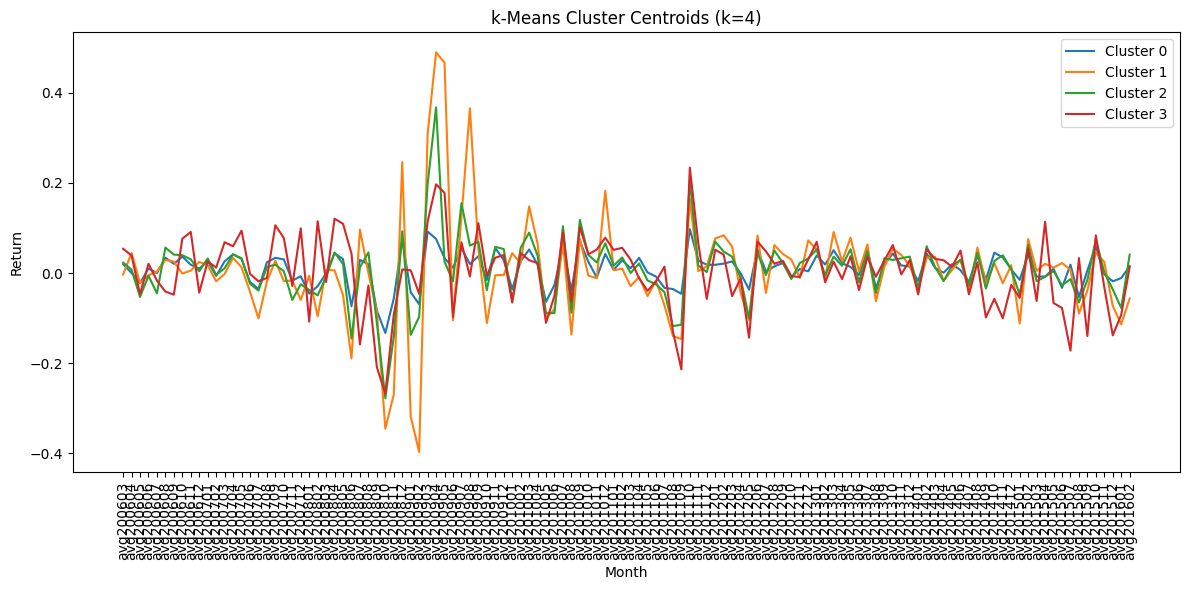

In [ ]:
#Q5.2


from sklearn.cluster import KMeans
# extract monthly return columns
return_cols = [c for c in df.columns if c.startswith("avg")]
X = df[return_cols].values

# run k-means with k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centroids=kmeans.cluster_centers_


#  plot centroids
plt.figure(figsize=(12,6))

for i in range(4):
    plt.plot(return_cols, centroids[i], label=f"Cluster {i}")

plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Return")
plt.title("k-Means Cluster Centroids (k=4)")
plt.legend()
plt.tight_layout()
plt.show()


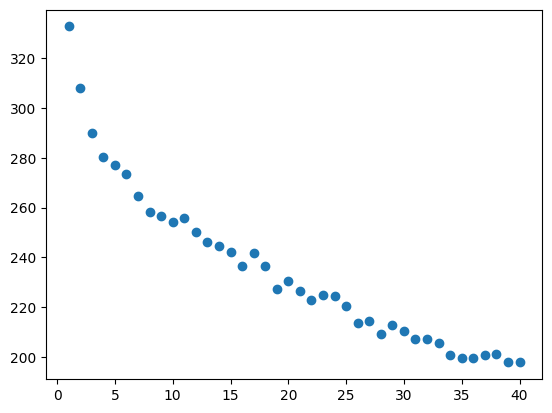

In [ ]:
#(B)


ks = range(1,41)
WCSS = [KMeans(n_clusters=k,n_init=1).fit(X).inertia_ for k in ks]

plt.scatter(ks,WCSS)

In [ ]:
#(c)
 #k= 7

 #(d)

k_7 = KMeans(n_clusters=7, n_init=20).fit(X)
labels = k_7.labels_          # cluster assignment
centroids_7 = k_7.cluster_centers_
print(centroids_7)

cluster_sizes = np.bincount(labels)
print(cluster_sizes)

#[139  44   5  23  28  55 139]

df_temp = df.assign(cluster=labels)

industry_count = df_temp.groupby(["cluster", "Industry"]).size()
print(industry_count)



[[ 2.71031970e-03  2.40804490e-02 -4.78547956e-02 -1.71463069e-02
   2.59037032e-02 -2.70920500e-03  2.29525230e-02  6.30377085e-03
   7.76808555e-03  2.32051442e-02  1.68333369e-02 -3.22852145e-02
  -2.37229812e-02  1.35869181e-02  2.20436807e-02 -5.92721900e-02
  -9.67648880e-02 -7.53771445e-03 -5.00409355e-02 -3.77582410e-02
  -9.35266301e-02 -7.29796323e-02  1.36298650e-01 -1.34707882e-01
  -8.24177180e-03 -4.51442395e-03 -8.26007255e-02 -2.41204279e-01
   1.39418859e-01  3.27325474e-02  7.84920458e-02 -1.34508025e-01
  -1.67489498e-01 -2.02348127e-02 -3.17917542e-01 -1.35545138e-01
   2.57195306e-01  2.63058271e-01  6.59669606e-02 -3.51302513e-02
   1.29682699e-01  1.67853091e-01 -2.92281615e-03 -9.38177691e-02
   4.70055696e-02 -3.22666540e-02  9.74242213e-02  1.93502284e-02
   8.98228691e-02  9.23157416e-02 -1.13394324e-01 -9.21606329e-02
   7.12176208e-02 -1.28792104e-01  6.78233549e-02 -3.99490524e-02
  -2.86574244e-02  1.59972061e-01  7.71554320e-03 -4.42917845e-03
  -2.39250

In [ ]:
#(e)

oct08 = "avg200810"
mar09 = "avg200903"
i_oct = return_cols.index(oct08)
i_mar = return_cols.index(mar09)
# every cluster's return value on  2008/10
oct_values = [centroids_7[c][i_oct] for c in range(len(centroids_7))]

# every cluster's return value on  2009/03
mar_values = [centroids_7[c][i_mar] for c in range(len(centroids_7))]
worst_value_oct = min(oct_values)
worst_cluster_oct = oct_values.index(worst_value_oct)

best_value_mar = max(mar_values)
best_cluster_mar = mar_values.index(best_value_mar)

worst_cluster_oct, worst_value_oct, best_cluster_mar, best_value_mar




(3, np.float64(-0.493296515), 3, np.float64(0.9411717739999998))

In [ ]:
#5.3


#(c)


from sklearn.cluster import SpectralClustering
corr = np.corrcoef(X, rowvar=True)

#similarity = abs(correlation)
sim = np.abs(corr)

# spectral clustering
spec = SpectralClustering(n_clusters=7, affinity='precomputed')
spec_labels = spec.fit_predict(sim)

spec_labels


array([4, 1, 3, 5, 4, 4, 1, 4, 6, 3, 3, 0, 0, 6, 5, 1, 3, 1, 5, 5, 3, 5,
       4, 3, 3, 4, 5, 4, 3, 3, 5, 3, 6, 6, 3, 3, 4, 1, 1, 1, 5, 1, 1, 3,
       4, 2, 4, 3, 2, 3, 4, 4, 3, 6, 4, 2, 3, 3, 2, 2, 3, 4, 6, 3, 1, 2,
       4, 4, 4, 6, 1, 2, 1, 1, 5, 5, 3, 4, 3, 3, 6, 3, 5, 2, 5, 6, 2, 2,
       1, 5, 3, 3, 0, 0, 6, 2, 6, 1, 5, 6, 3, 4, 3, 5, 3, 1, 3, 3, 3, 3,
       1, 5, 3, 6, 0, 1, 1, 4, 4, 3, 3, 1, 3, 2, 3, 6, 6, 3, 1, 5, 0, 0,
       4, 6, 3, 1, 2, 0, 3, 0, 5, 4, 1, 3, 6, 1, 6, 1, 6, 3, 3, 0, 3, 0,
       3, 1, 1, 1, 6, 1, 0, 3, 2, 3, 5, 1, 6, 3, 6, 3, 6, 3, 0, 1, 4, 4,
       3, 3, 5, 3, 2, 5, 3, 3, 1, 3, 6, 1, 3, 2, 1, 5, 3, 6, 5, 1, 3, 1,
       6, 4, 4, 5, 4, 1, 4, 5, 4, 5, 3, 5, 3, 5, 1, 1, 1, 1, 1, 3, 3, 1,
       1, 3, 6, 4, 1, 6, 2, 3, 4, 2, 1, 1, 0, 3, 5, 2, 3, 1, 3, 1, 3, 4,
       3, 5, 3, 4, 5, 3, 3, 1, 1, 1, 4, 1, 1, 1, 1, 5, 3, 4, 1, 4, 4, 5,
       1, 4, 2, 2, 5, 4, 4, 6, 5, 6, 4, 3, 1, 2, 4, 6, 3, 6, 6, 4, 6, 0,
       6, 3, 6, 1, 3, 4, 6, 6, 2, 3, 4, 5, 3, 1, 1,

In [ ]:

df_temp = df.assign(spec=spec_labels)
df_temp.groupby(['spec','Industry']).size()


spec  Industry                   
0     Consumer Staples                1
      Utilities                      25
1     Consumer Discretionary         27
      Energy                          1
      Financials                     21
      Health Care                     4
      Industrials                    18
      Information Technology          9
      Materials                      10
      Utilities                       1
2     Consumer Discretionary          3
      Consumer Staples                4
      Financials                     24
      Health Care                     3
      Industrials                     4
      Materials                       3
3     Consumer Discretionary         31
      Consumer Staples                4
      Financials                      9
      Health Care                     6
      Industrials                    21
      Information Technology         32
      Materials                       7
      Telecommunications Services     5
4     Consumer Discretionary          1
      Consumer Staples               11
      Financials                      6
      Health Care                    24
      Industrials                     7
      Information Technology         11
      Materials                       1
5     Consumer Discretionary          7
      Consumer Staples               11
      Energy                          2
      Financials                     18
      Health Care                     7
      Industrials                     2
      Information Technology          4
      Materials                       2
6     Consumer Staples                1
      Energy                         35
      Industrials                     3
      Materials                       5
      Utilities                       2
dtype: int64